In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

import main_urnings as mu
import utilities as util

In [16]:
#game settings
n_player = 1
n_items = 1000
starting_score = 5
player_urn_sizes = 10
item_urn_sizes = 10000
n_sim = 10000

#true scores for players and items
item_true_values = np.random.uniform(0, 1, n_items)

#creating players and items
players = []
for i in range(n_player):
    player = mu.Player(user_id = "Student", score = starting_score, urn_size = player_urn_sizes, true_value = 0.2, so_score=10)
    players.append(player)

items = []
for i in range(n_items):
    iname = "item" + str(i)

    item = mu.Player(user_id = iname, score = item_true_values[i] * item_urn_sizes, urn_size = item_urn_sizes, true_value = item_true_values[i])
    items.append(item)


adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings2")
adaptive_sim = mu.Urnings(players = players, items = items, game_type=adaptive_rule)

In [17]:
adaptive_sim.play(n_games=n_sim, test = False)

(array([ 7.,  0.,  0.,  0.,  0., 28.,  0.,  0.,  0.,  5.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

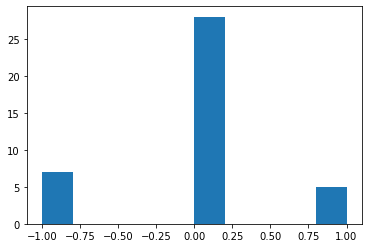

In [13]:
plt.hist(players[0].differential_container[0:40])

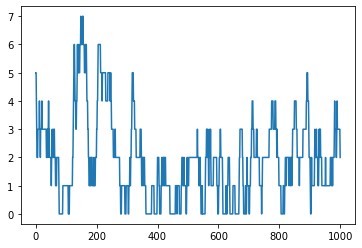

In [7]:
plt.plot(players[0].container)

In [ ]:
urnings_matrix = np.zeros((n_player, n_sim))

for pl in range(n_player):
    row = players[pl].container[1:]
    urnings_matrix[pl,:] = row

#np.savetxt("urnings_matrix.csv", urnings_matrix, delimiter=",")

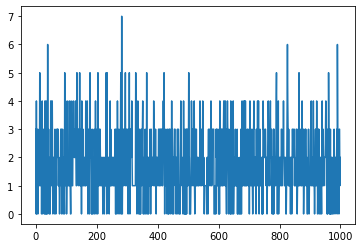

In [12]:
my_data = np.genfromtxt('urnings_matrix.csv', delimiter=',')

plt.plot(my_data[:, 99])

In [ ]:
results = []
print(my_data.shape)
for cl in range(n_sim-1):
    results.append(util.binomial_gof(np.round(my_data[:,cl]), 10, true_p=0.2))

In [13]:
print(results)

[(9774.483857575757, 0.0), (116053.60686363636, 0.0), (5803.338936363636, 0.0), (5548.479964935065, 0.0), (3676.8344861471865, 0.0), (2840.1644255411256, 0.0), (7226.849211688311, 0.0), (4216.61768961039, 0.0), (3503.3431753246755, 0.0), (2859.769814285715, 0.0), (2839.567313852814, 0.0), (5481.693443722944, 0.0), (5597.1547632034635, 0.0), (6346.759556277057, 0.0), (6010.290001298701, 0.0), (3801.8314177489174, 0.0), (5763.294108658008, 0.0), (5489.615701731602, 0.0), (6151.054094805194, 0.0), (3883.434687012987, 0.0), (3824.6036705627703, 0.0), (4927.0241173160175, 0.0), (4565.2138870129875, 0.0), (4582.715864502165, 0.0), (36428.7188982684, 0.0), (12817.697267099567, 0.0), (11034.082763203465, 0.0), (48460.41191991342, 0.0), (9719.20292943723, 0.0), (10309.053305194806, 0.0), (25813.390759740258, 0.0), (26394.431410822515, 0.0), (9871.969544155843, 0.0), (9941.08222987013, 0.0), (10610.434458441558, 0.0), (28013.84707142857, 0.0), (26445.33285497835, 0.0), (9856.558122510824, 0.0), 